In [2]:
#Import the file from google drive since i saved it there

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Extract file to the local environment

!unzip /content/gdrive/MyDrive/rockpaperscissors.zip

base_dir = '/content/rockpaperscissors/rps-cv-images'
train_dir = '/content/output/train'
validation_dir = '/content/output/val'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

In [4]:
#Installing split folders

!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#Split the file as requested

import splitfolders
splitfolders.ratio(base_dir, output="output", seed=1337, ratio=(.6, .4), group_prefix=None)

Copying files: 2188 files [00:00, 3565.66 files/s]


Augmentation and Generate Image Data

In [14]:
#Import tensorflow

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose =2,
)

Epoch 1/20
41/41 - 77s - loss: 1.1469 - accuracy: 0.4748 - val_loss: 0.7979 - val_accuracy: 0.6505 - 77s/epoch - 2s/step
Epoch 2/20
41/41 - 73s - loss: 0.6375 - accuracy: 0.7515 - val_loss: 0.5990 - val_accuracy: 0.7650 - 73s/epoch - 2s/step
Epoch 3/20
41/41 - 73s - loss: 0.4201 - accuracy: 0.8521 - val_loss: 0.2794 - val_accuracy: 0.9155 - 73s/epoch - 2s/step
Epoch 4/20
41/41 - 73s - loss: 0.2647 - accuracy: 0.9070 - val_loss: 0.2897 - val_accuracy: 0.9005 - 73s/epoch - 2s/step
Epoch 5/20
41/41 - 74s - loss: 0.2154 - accuracy: 0.9253 - val_loss: 0.2514 - val_accuracy: 0.9005 - 74s/epoch - 2s/step
Epoch 6/20
41/41 - 73s - loss: 0.1822 - accuracy: 0.9436 - val_loss: 0.2291 - val_accuracy: 0.9259 - 73s/epoch - 2s/step
Epoch 7/20
41/41 - 74s - loss: 0.1623 - accuracy: 0.9505 - val_loss: 0.1730 - val_accuracy: 0.9398 - 74s/epoch - 2s/step
Epoch 8/20
41/41 - 73s - loss: 0.1383 - accuracy: 0.9497 - val_loss: 0.2184 - val_accuracy: 0.9201 - 73s/epoch - 2s/step
Epoch 9/20
41/41 - 73s - loss: 0

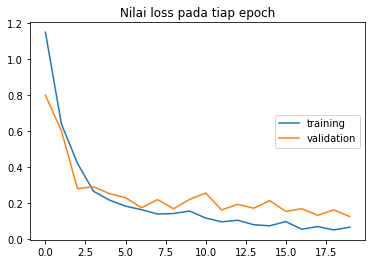

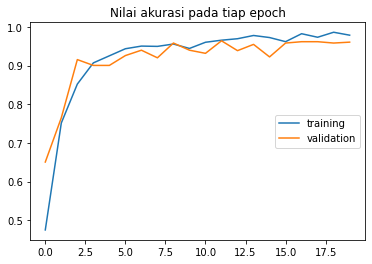

In [26]:
from matplotlib import pyplot as plt
#loss train & validation

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nilai loss pada tiap epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()

#accuracy train and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Nilai akurasi pada tiap epoch')
plt.legend(['training','validation'], loc='center right')
plt.show()

Saving 0eqArS2GgsBeqgSn.png to 0eqArS2GgsBeqgSn.png
0eqArS2GgsBeqgSn.png
paper


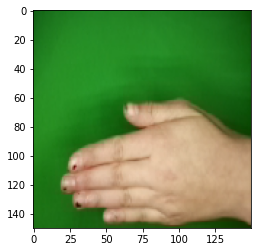

In [28]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')